In [2]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session
from keras import backend as K
config = tf.ConfigProto()
# A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.allocator_type = 'BFC' 
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
# set_session(tf.Session(config=config))

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
# 分类 [0, 1, 2, ... ,9]
num_classes = 10
# 输入形状
input_shape = (28, 28, 1)

# 获取数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 数据集中每个像素值为[0, 255]，现在将其范围转变成 [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# 检查输入
print(f"x_train 形状: {x_train.shape}")
print(f"{x_train.shape[0]} 个训练样本")
print(f"{x_test.shape[0]} 个测试样本")


# 将输出 one hot 化 （0，1，0，0）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train 形状: (60000, 28, 28, 1)
60000 个训练样本
10000 个测试样本


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
____

In [14]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=input_shape),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size = 1024
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 0s 7us/sample - loss: 0.7624 - acc: 0.7844 - val_loss: 0.2694 - val_acc: 0.9282
Epoch 2/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.3100 - acc: 0.9116 - val_loss: 0.2002 - val_acc: 0.9463
Epoch 3/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.2453 - acc: 0.9302 - val_loss: 0.1644 - val_acc: 0.9588
Epoch 4/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.2046 - acc: 0.9414 - val_loss: 0.1391 - val_acc: 0.9633
Epoch 5/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.1754 - acc: 0.9502 - val_loss: 0.1257 - val_acc: 0.9668
Epoch 6/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.1546 - acc: 0.9554 - val_loss: 0.1149 - val_acc: 0.9685
Epoch 7/50
54000/54000 [==============================] - 0s 5us/sample - loss: 0.1380 - acc: 0.9604 - val_loss: 0.1039 - v

KeyboardInterrupt: 

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("测试集 loss:", score[0])
print("测试集准确度", score[1])

测试集 loss: 0.05986622227983317
测试集准确度 0.981


# 查看输出

In [17]:
y_pred = model.predict(x_test, batch_size=1024)

In [18]:
def display_img(idx):
    pixels = x_test[idx].reshape([28,28])
    plt.gray()
    plt.imshow(pixels)
    ans = np.argmax(y_test[idx])
    pred = np.argmax(y_pred[idx])
    print(f"答案：{ans}")
    print(f"预测：{pred}")

答案：4
预测：4


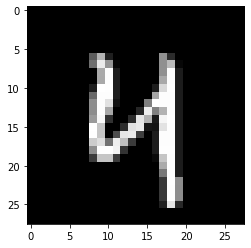

In [21]:
display_img(789)